# Explore optional tiles (backgrounds/layers) for map plots

Options built into Mapper2, here for overview.

In [1]:
#obtain data, country month
from viewser import Queryset, Column

queryset = (Queryset("Mapper_tester_cm", "country_month")
            # CONFLICT TYPES NOT LOGGED and NOT time lagged
            .with_column(Column("ged_best_sb", from_table="ged2_cm", from_column="ged_sb_best_sum_nokgi")
                         .transform.missing.fill()
                         )
            # .with_column(Column('name', from_table='country', from_column= 'name')
            # the above does not seem to want to work

            .with_theme("fatalities")

            .describe("""Fatalities conflict history, cm level
            Mapper testing

            """)

            )

cm_master = queryset.publish().fetch()

 .    

In [2]:
#fetch the multipolygons for mapping
import geopandas as gpd
import sqlalchemy as sa
from ingester3.config import source_db_path

engine = sa.create_engine(source_db_path)
gdf_ci_master = gpd.GeoDataFrame.from_postgis(
    "SELECT id as country_id, in_africa, name, in_me, geom FROM prod.country",
    engine,
    geom_col='geom'
)
gdf_ci_master = gdf_ci_master.to_crs(4326)

In [3]:
#Mapper2 
from views_mapper2.mapper2 import *
from views_mapper2.label_writer import *
from views_mapper2.dictionary_writer import *
from views_mapper2.BBoxWriter import*

# showing off the various backgrounds

background tiles are essentially jpeg like images that vary depending on the location where we focus. More information on regional information with closer look and less further out. As we are using them in their non-native forms through geopandas, a lot of the original html/web modifiability is lost. So not possible to ask only for country names and large cities. 

To see examples, please substitute with the names below in the name variable, e.g. name = 'OpenTopoMap'

Some of the maps look better as background in masked versions. 


1. OpenTopoMap - includes both country names and topography, colorful, no built in layered labels so 100% opacity will prevent the view of the country names. Additionally colorful background interferes with the 1:1 use of the colorbar when violence layer is transparent as one must account for underlying color and how it interacts with the transparent overlay. But the general gist of the color is still understandble. Works well for masked versions of specific countries.
2. OpenStreetMap - includes names of countries, regions, etc. No topographic data. No build in layered labels so 100% opacity will prevent the view of country names. Monochromatic colorpalette allows for easier interpretation of transparent layer overlayers. 
3. StamenLite - includes names of countries, regions, etc. No topographic data. Greyscale. Built layer. Does not look good for 100% opacity but this version will still make it possible to see the labels. Due to nature of geopandas, labels occasionally collide with the viewtextbox as they are layered on top of everything. 
4. StamenWatercolor - same as above but with colorful theme, no country borders build in.
5. StamenTerrain - tiles with both country names and terrain, no built in labels so 100% opacity will interfere.
6. StamenTerrainBackground - only terrain information of the above
7. CartoDBPositron - similar to StamenLite but with slightly less information
8. CartoDBVoyager - similar to above, more recent release


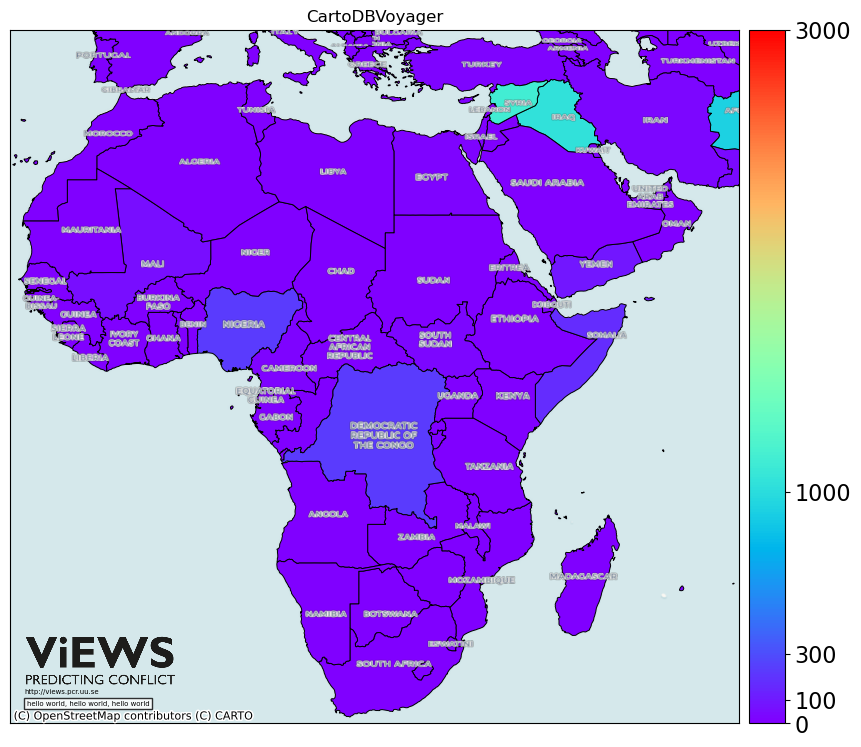

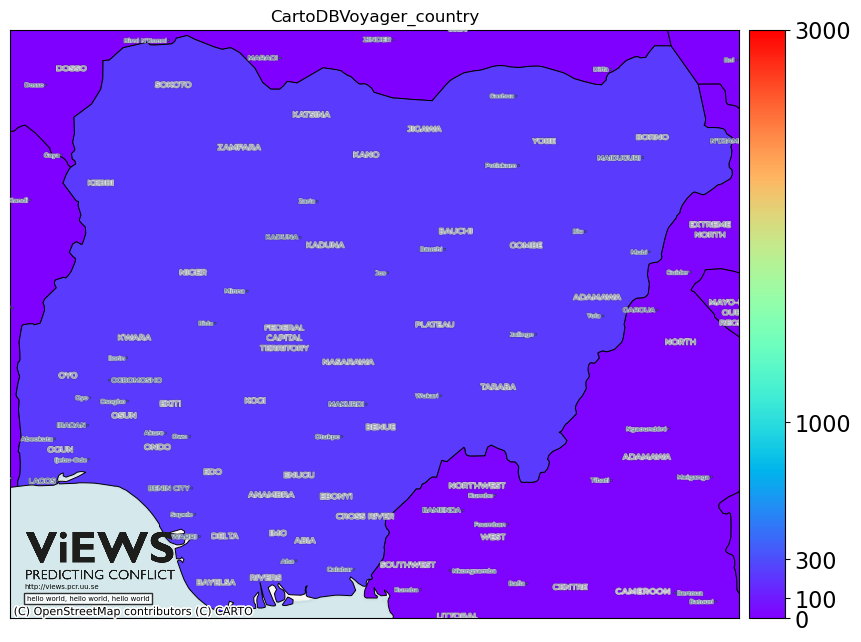

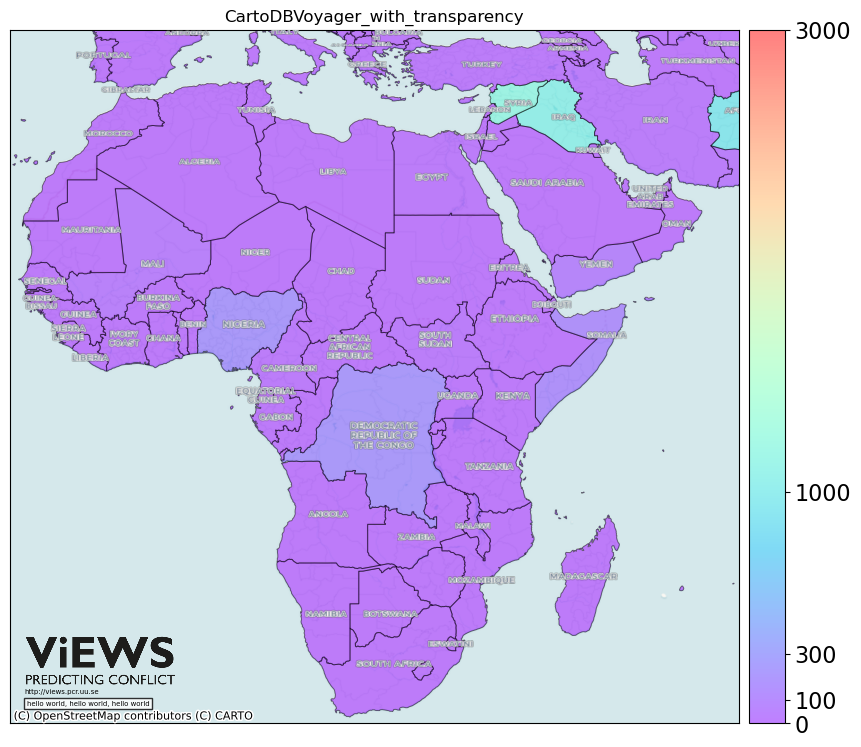

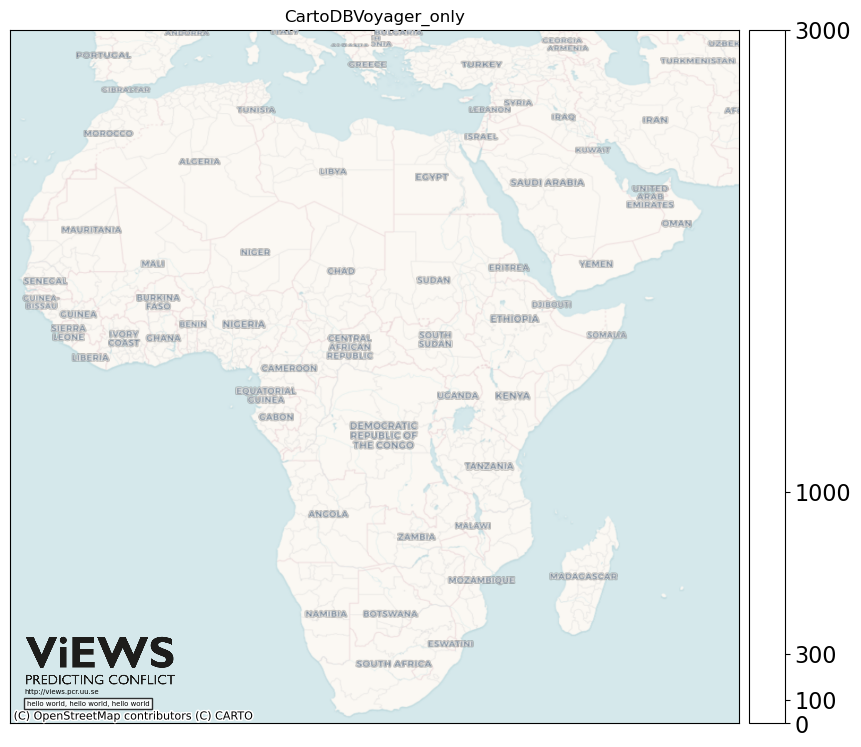

In [18]:
data= cm_master.copy()
gdf = gdf_ci_master.copy()

data = data.join(gdf.set_index("country_id"))
gdf = gpd.GeoDataFrame(data, geometry="geom")


#name = 'OpenTopoMap'
#name = 'OpenStreetMap' # yes for everything
#name = 'StamenLite'
#name = 'StamenWatercolor'
#name = 'StamenTerrain'
#name = 'StamenTerrainBackground'
#name = 'CartoDBPositron'
name = 'CartoDBVoyager' # nice for Africa view




a = Mapper2(
    width=10,
    height=10,
    frame_on=True,
    title=name, 
    bbox = bbox_from_cid('ame')
).add_layer(
    gdf=gdf.loc[450],
    map_dictionary = dictionary_stand,
    cmap = 'rainbow',
    transparency = 1,
    edgecolor="black",
    linewidth=0.7,
    column="ged_best_sb", 
    background = name
).add_views_textbox(
    text='hello world, hello world, hello world',
    textsize=10)

a2 = Mapper2(
    width=10,
    height=10,
    frame_on=True,
    title=f'{name}_country', 
    bbox = bbox_from_cid(79)
).add_layer(
    gdf=gdf.loc[450],
    map_dictionary = dictionary_stand,
    cmap = 'rainbow',
    transparency = 1,
    edgecolor="black",
    linewidth=0.7,
    column="ged_best_sb", 
    background = name
).add_views_textbox(
    text='hello world, hello world, hello world',
    textsize=10)

b = Mapper2(
    width=10,
    height=10,
    frame_on=True,
    title=f'{name}_with_transparency', 
    bbox = bbox_from_cid('ame')
).add_layer(
    gdf=gdf.loc[450],
    map_dictionary = dictionary_stand,
    cmap = 'rainbow',
    transparency = 0.5,
    edgecolor="black",
    linewidth=0.7,
    column="ged_best_sb", 
    background = name
).add_views_textbox(
    text='hello world, hello world, hello world',
    textsize=10)

c = Mapper2(
    width=10,
    height=10,
    frame_on=True,
    title= f'{name}_only', 
    bbox = bbox_from_cid('ame')
).add_layer(
    gdf=gdf.loc[450],
    map_dictionary = dictionary_stand,
    cmap = 'rainbow',
    transparency = 0.0,
    edgecolor="black",
    linewidth=0.7,
    column="ged_best_sb", 
    background = name
).add_views_textbox(
    text='hello world, hello world, hello world',
    textsize=10)

# Experimental labels

experimental labels are my own creation. It creates and centers a name in the country geometry
works at variable success rate
adjustment of the font size can result in improved results
recommend with zoom in on specific countries

adjust font to note how sometimes labels work and other times they start to collide

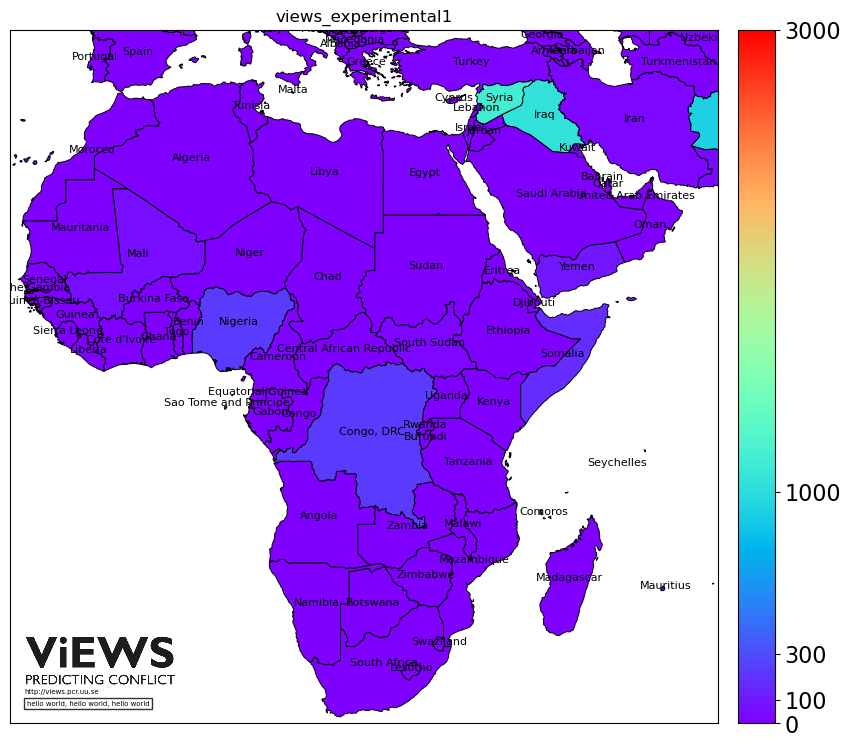

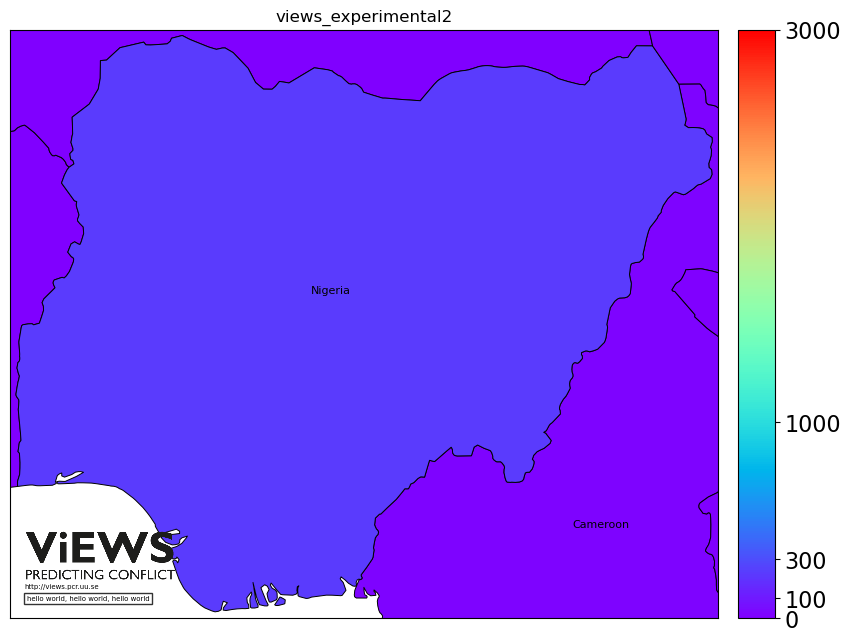

In [17]:
data= cm_master.copy()
gdf = gdf_ci_master.copy()

data = data.join(gdf.set_index("country_id"))
gdf = gpd.GeoDataFrame(data, geometry="geom")

font = 8


a = Mapper2(
    width=10,
    height=10,
    frame_on=True,
    title='views_experimental1', 
    bbox = bbox_from_cid('ame')
).add_layer(
    gdf=gdf.loc[450],
    map_dictionary = dictionary_stand,
    cmap = 'rainbow',
    transparency = 1,
    edgecolor="black",
    linewidth=0.7,
    column="ged_best_sb",
    views_experimental_labels = 8
).add_views_textbox(
    text='hello world, hello world, hello world',
    textsize=10)

a2 = Mapper2(
    width=10,
    height=10,
    frame_on=True,
    title= 'views_experimental2', 
    bbox = bbox_from_cid(79)
).add_layer(
    gdf=gdf.loc[450],
    map_dictionary = dictionary_stand,
    cmap = 'rainbow',
    transparency = 1,
    edgecolor="black",
    linewidth=0.7,
    column="ged_best_sb",
    views_experimental_labels = font
).add_views_textbox(
    text='hello world, hello world, hello world',
    textsize=10)